In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('flip_books_after_cleaning.csv')

Does a high price for a book always correspond to a high average user rating?

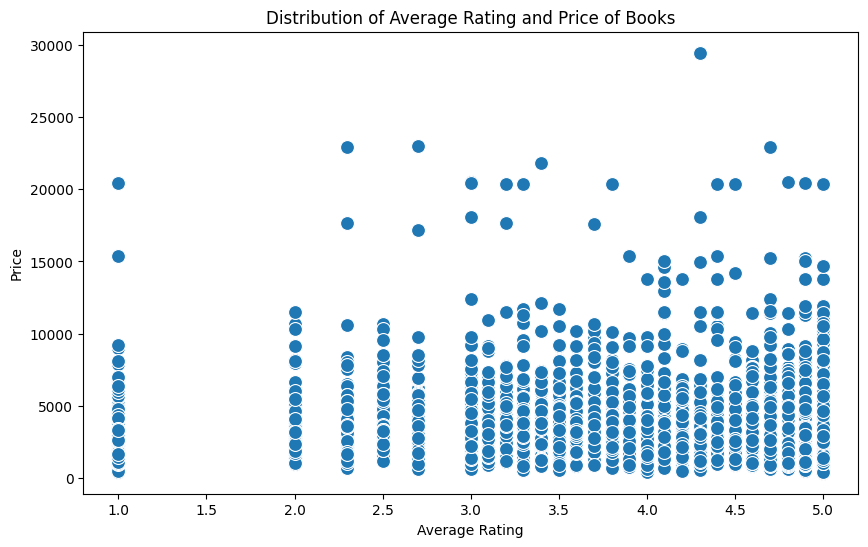

In [2]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Rate Average', y='Price', data=df, s=100)

plt.title('Distribution of Average Rating and Price of Books')
plt.xlabel('Average Rating')
plt.ylabel('Price')

plt.show()

Top 15 Authors with the Most Published Books

/tmp/ipykernel_61825/492085827.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_authors.index, y=top_10_authors.values, palette='viridis')


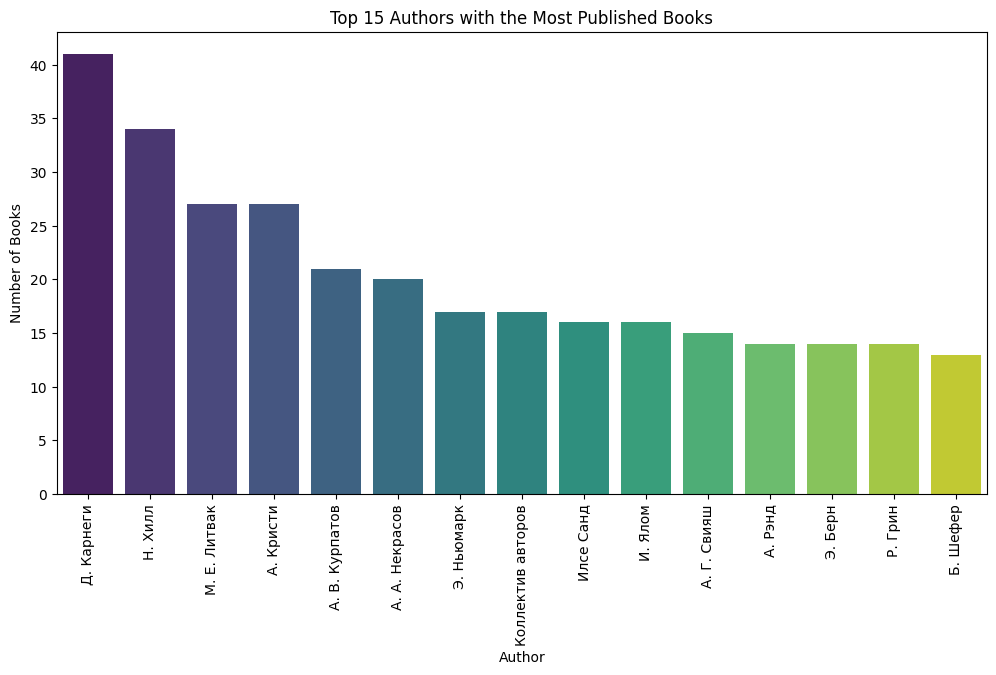

In [3]:
author_books_count = df['Author'].value_counts()

top_10_authors = author_books_count.head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_authors.index, y=top_10_authors.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 15 Authors with the Most Published Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.show()

Distribution of top 20 Categories with Price

/tmp/ipykernel_61825/1858864664.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_categories, x='Price', y='Category', palette='viridis')


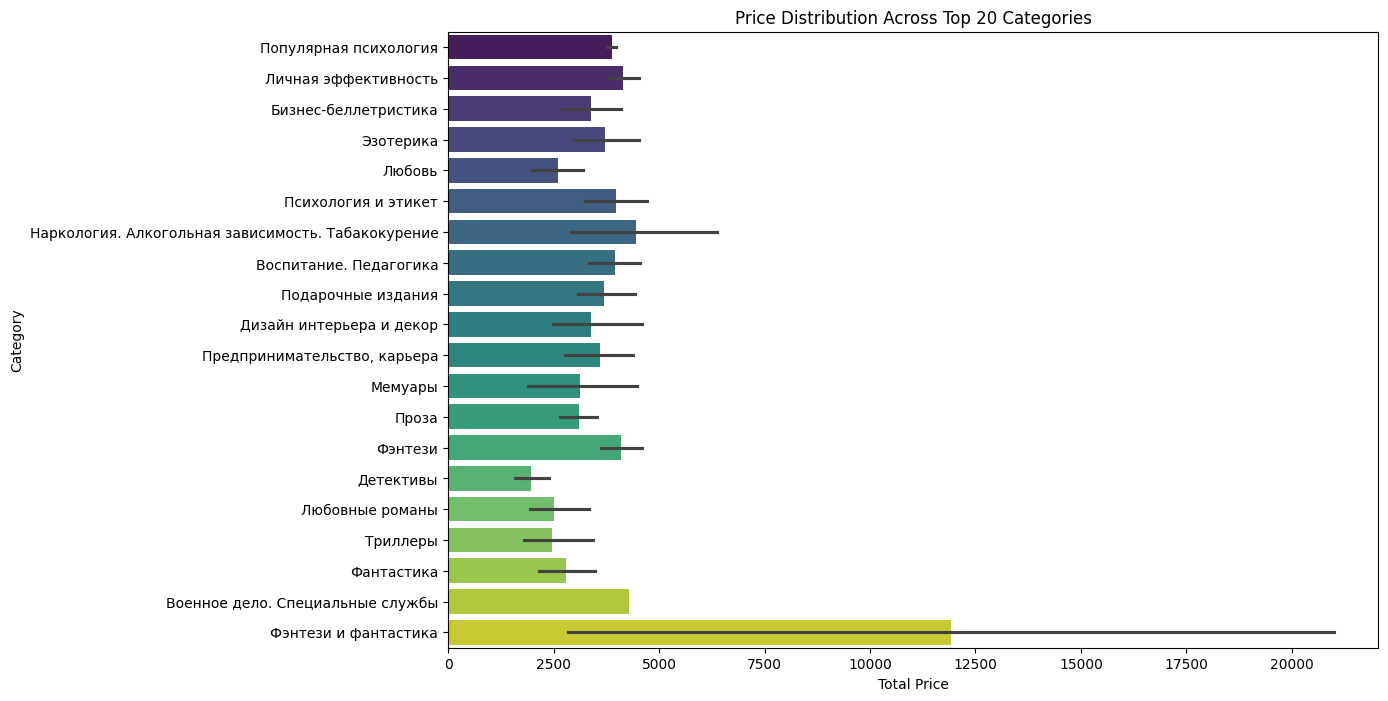

In [4]:
top_20_categories = df.groupby('Category')['Price'].sum().nlargest(20).index

df_top_categories = df[df['Category'].isin(top_20_categories)]

plt.figure(figsize=(12, 8))
sns.barplot(data=df_top_categories, x='Price', y='Category', palette='viridis')

plt.xlabel('Total Price')
plt.ylabel('Category')
plt.title('Price Distribution Across Top 20 Categories')

plt.show()

Correlation matrix between the 'Price' and other numerical columns 

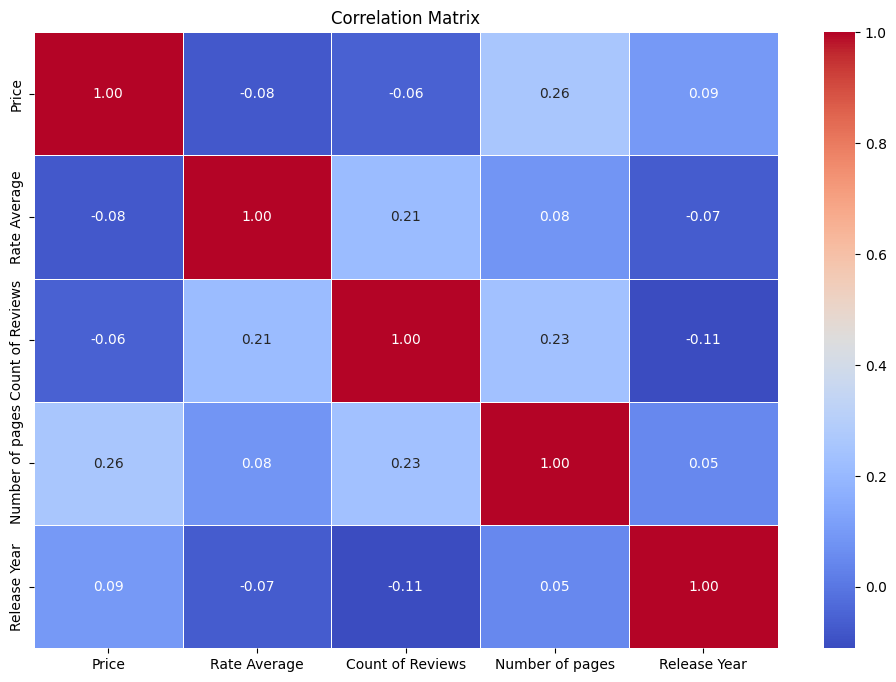

In [5]:
numerical_columns = ['Price', 'Rate Average', 'Count of Reviews', 'Number of pages', 'Release Year']

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Relationship between Price and Number of pages

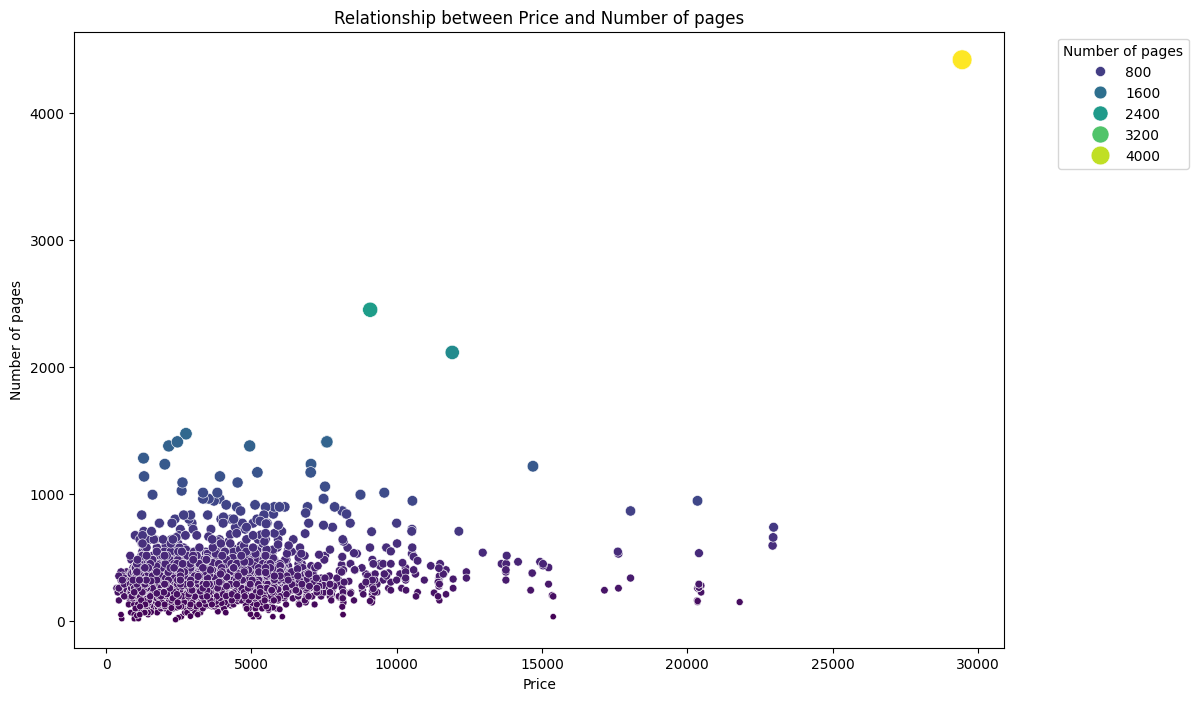

In [6]:
numeric_column = 'Number of pages'

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Price', y=numeric_column, data=df, hue=numeric_column, palette='viridis', size=numeric_column, sizes=(20, 200))

plt.xlabel('Price')
plt.ylabel(numeric_column)
plt.title(f'Relationship between Price and {numeric_column}')

plt.legend(title=numeric_column, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The most category of books released each year

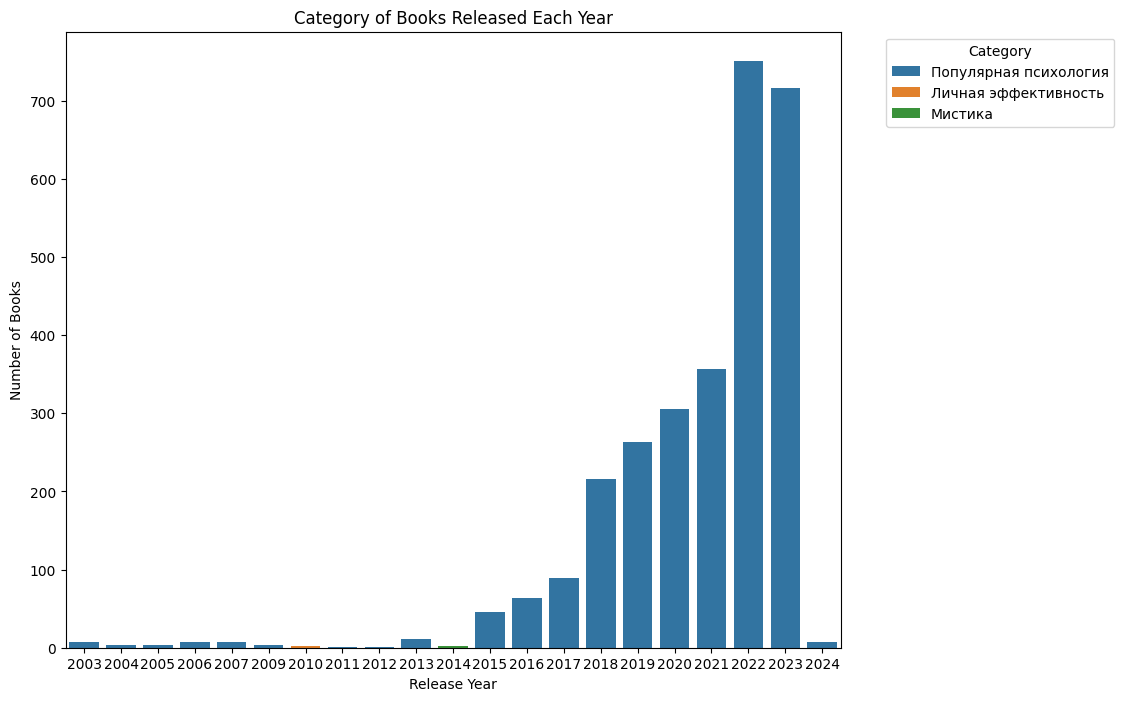

In [7]:
df['Release Year'] = df['Release Year'].astype(int)

yearly_category_count = df.groupby(['Release Year', 'Category']).size().reset_index(name='Book Count')

max_category_per_year = yearly_category_count.loc[yearly_category_count.groupby('Release Year')['Book Count'].idxmax()]

plt.figure(figsize=(10, 8))
sns.barplot(x='Release Year', y='Book Count', hue='Category', data=max_category_per_year)
plt.title('Category of Books Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Books')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


Distribution of Rate Average

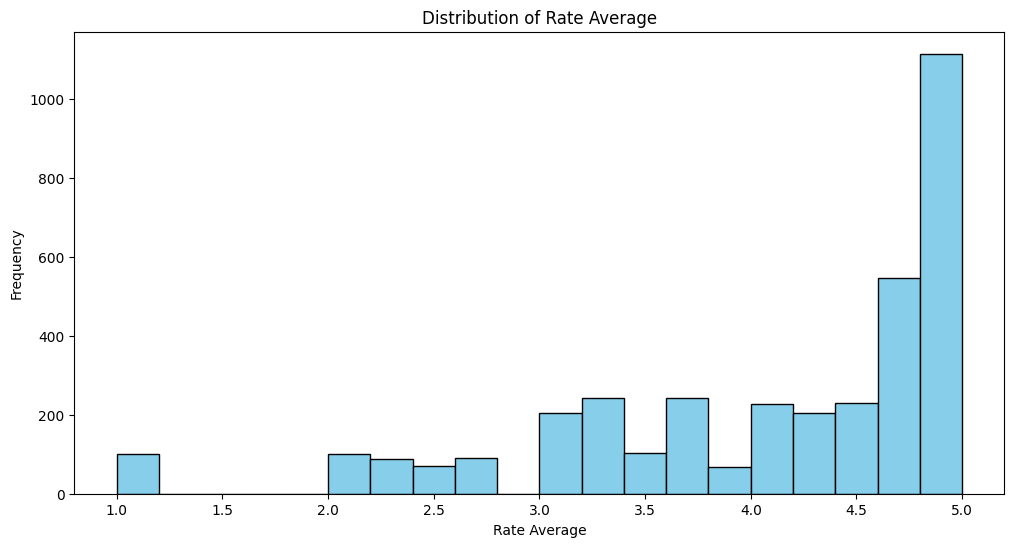

In [8]:
plt.figure(figsize=(12, 6))
plt.hist(df['Rate Average'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Rate Average')
plt.xlabel('Rate Average')
plt.ylabel('Frequency')
plt.show()

Distribution of Rate Average with count of reviews

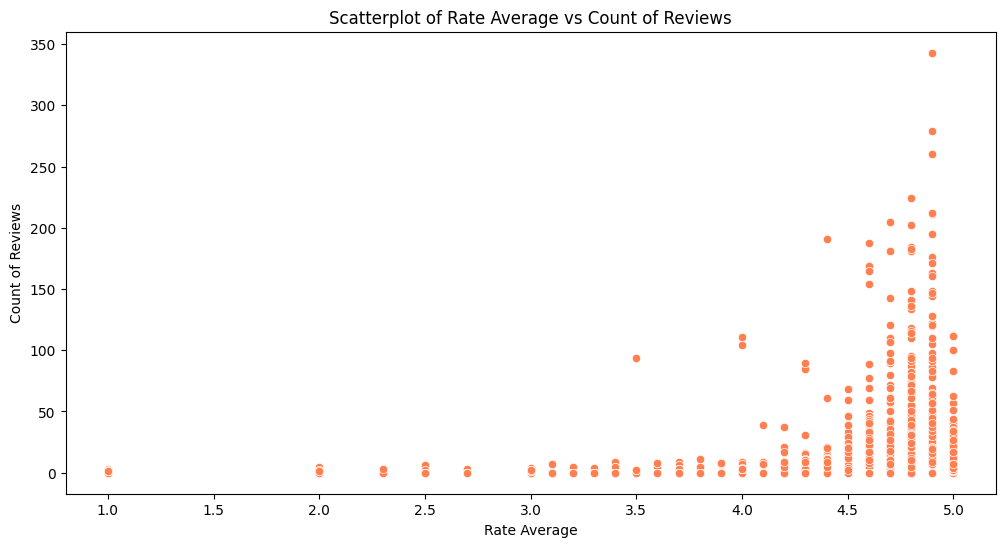

In [9]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rate Average', y='Count of Reviews', data=df, color='coral')
plt.title('Scatterplot of Rate Average vs Count of Reviews')
plt.show()

Pairplot of Rate Average, Count of Reviews, Price, and Number of pages

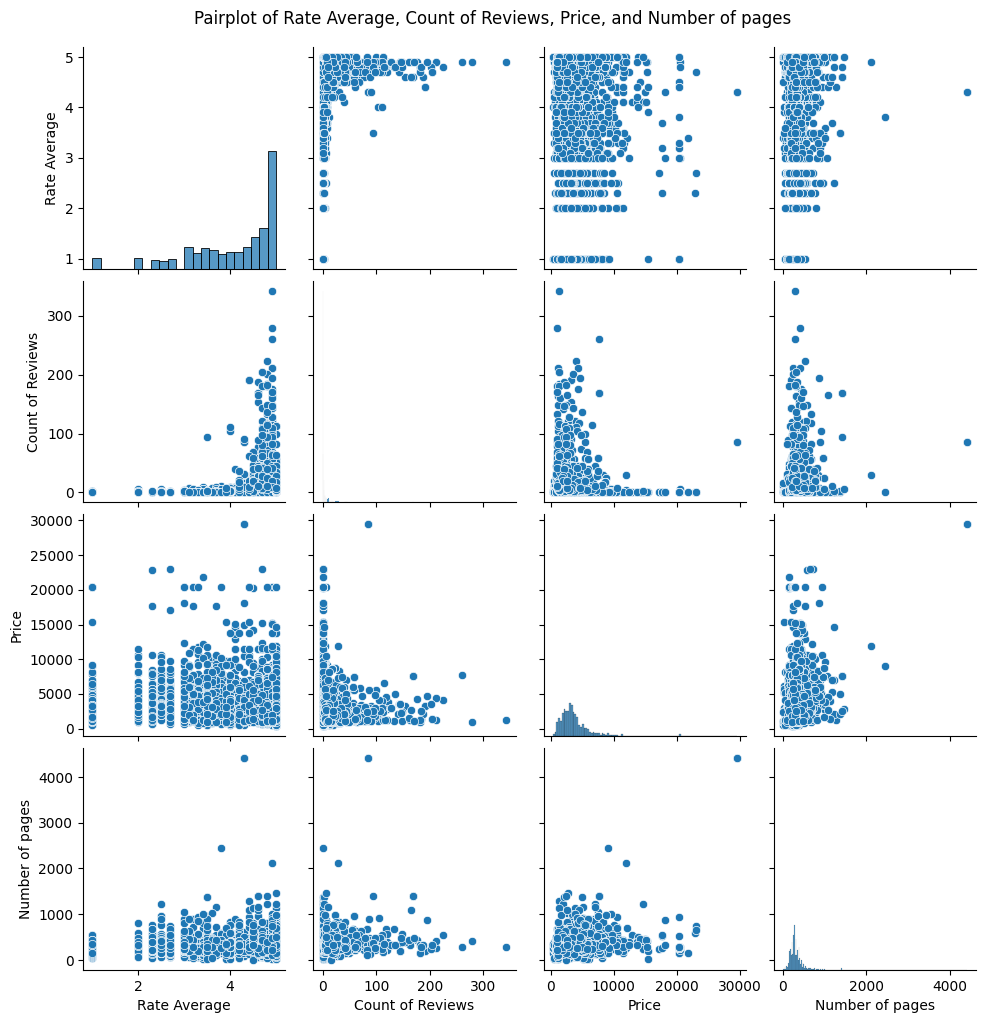

In [10]:
sns.pairplot(df[['Rate Average', 'Count of Reviews', 'Price', 'Number of pages']])
plt.suptitle('Pairplot of Rate Average, Count of Reviews, Price, and Number of pages', y=1.02)
plt.show()

Top 100 categories by average rating of books

/tmp/ipykernel_61825/4037969811.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Rate Average', data=top_categories, palette='pastel')


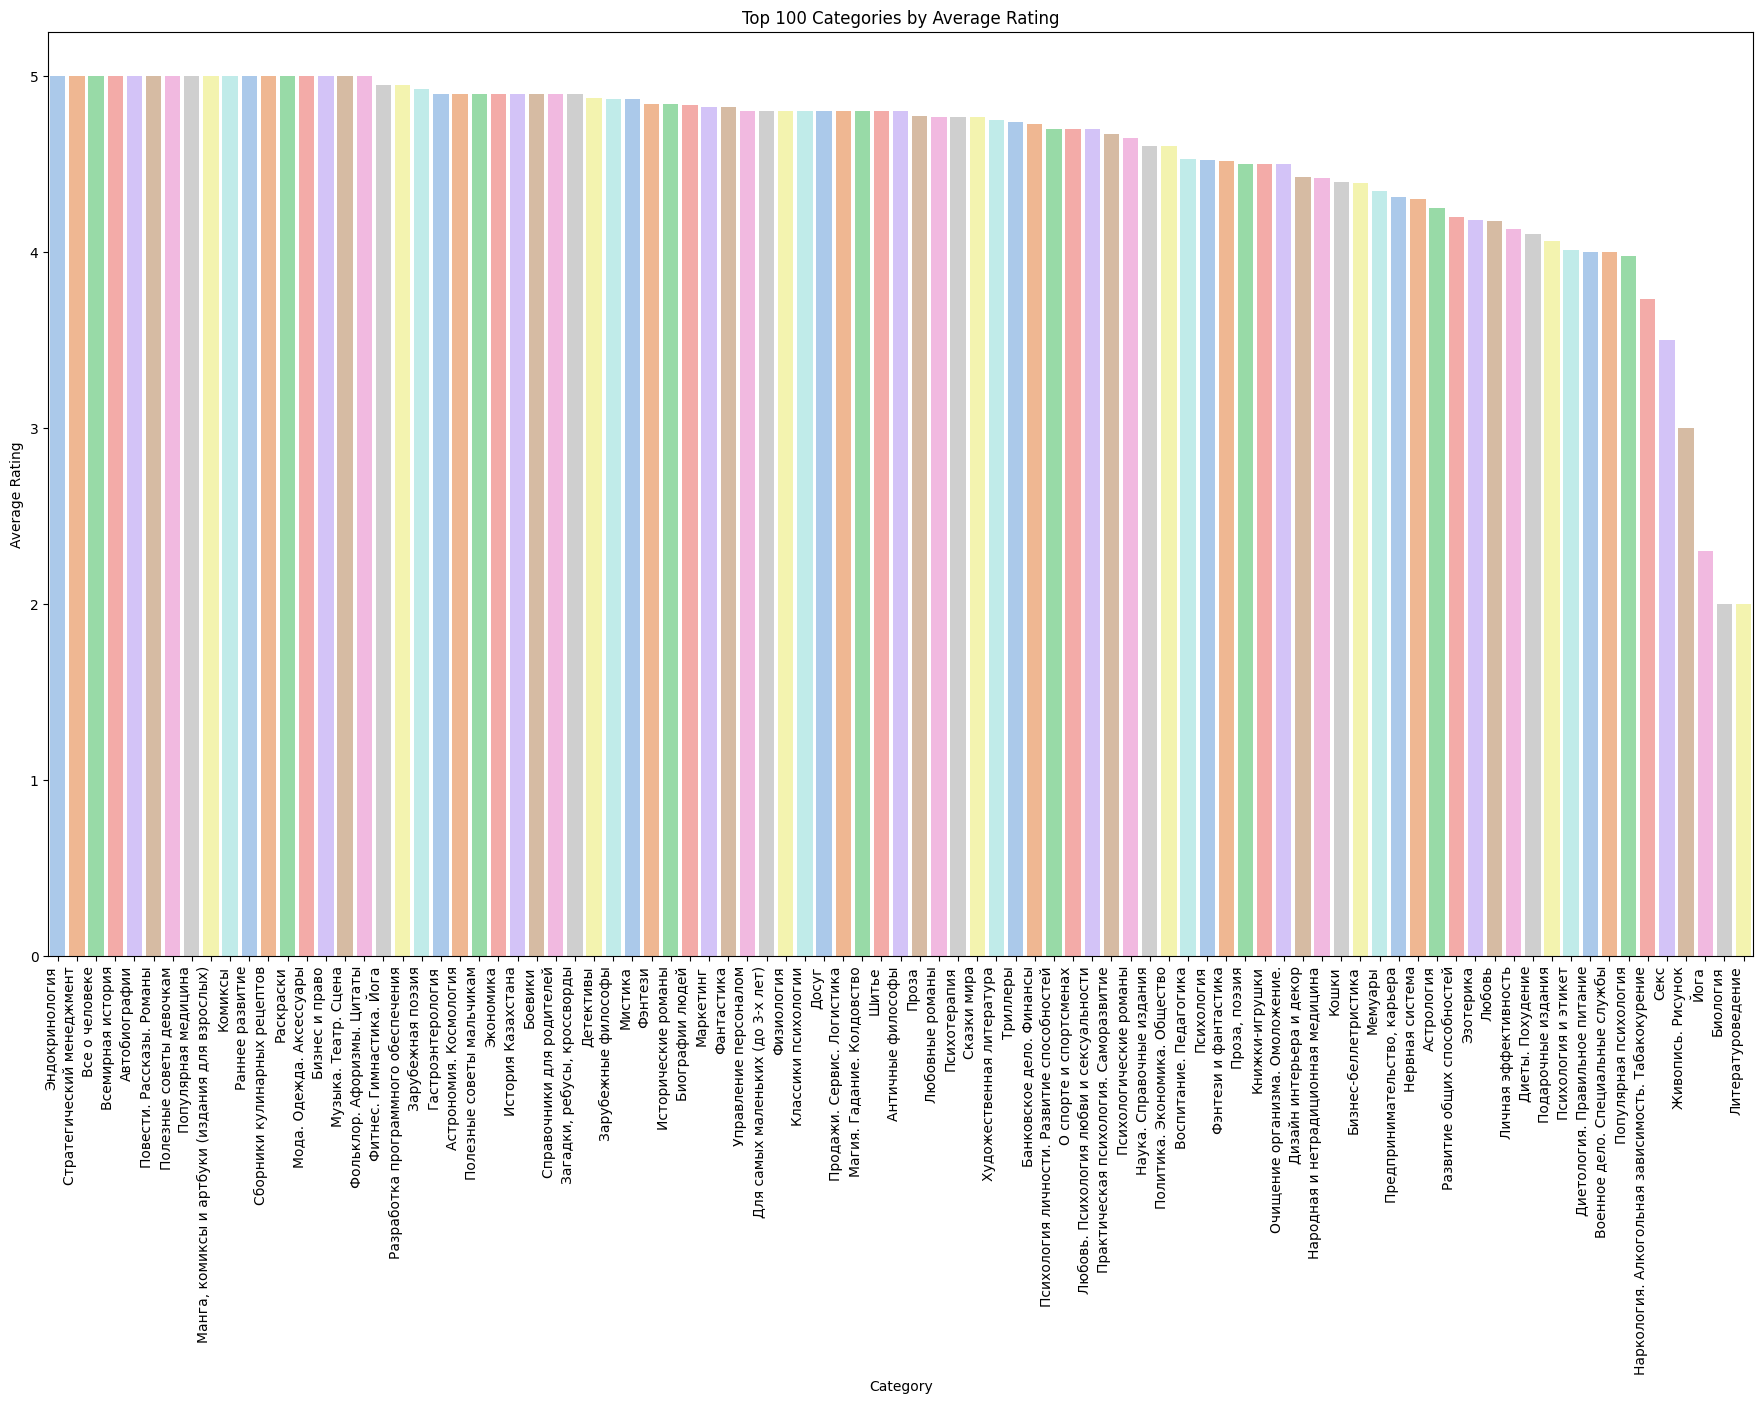

In [11]:
top_categories = df.groupby('Category')['Rate Average'].mean().sort_values(ascending=False).head(100).reset_index()

# Plot the data using Seaborn
plt.figure(figsize=(22, 12))
sns.barplot(x='Category', y='Rate Average', data=top_categories, palette='pastel')
plt.title('Top 100 Categories by Average Rating')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()

Price Distribution by Paper Type

/tmp/ipykernel_61825/3371739364.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Paper Type', y='Price', data=df, palette='Set3')


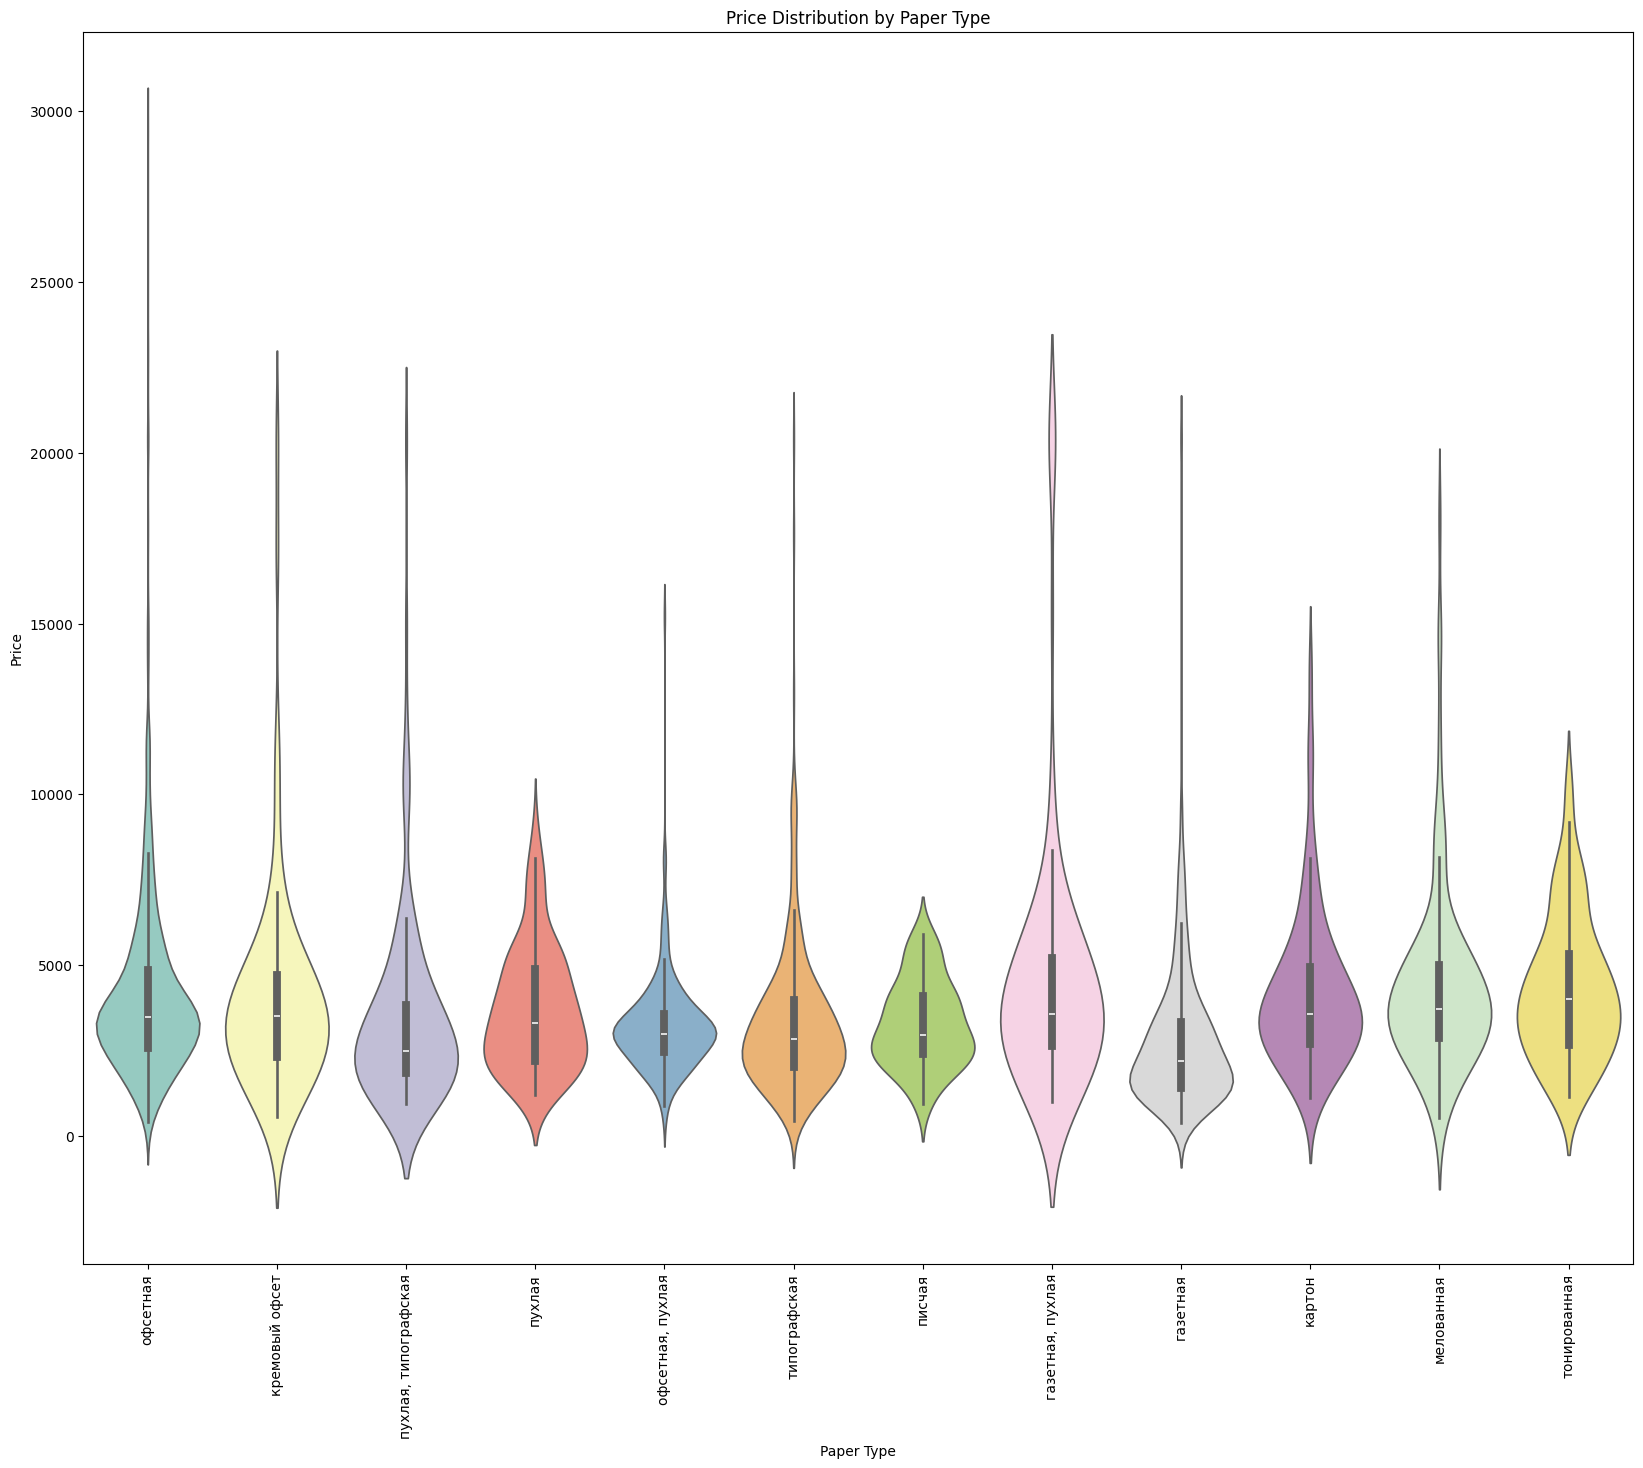

In [12]:
plt.figure(figsize=(20, 16))
sns.violinplot(x='Paper Type', y='Price', data=df, palette='Set3')
plt.xticks(rotation=90)
plt.title('Price Distribution by Paper Type')
plt.show()